<h4 align=center>Dr. Jesús Martí Gavilá. Departamento de Ingeniería Cartográfica, Geodesia y fotogrametría </h4>
<font color="blue" ><h1 align=center>PRÁCTICA 9</h1> <p> <h1 align=center> GOOGLE EARTH ENGINE PARA PYTHON</h1></font>

<a href="http://www.upv.es/titulaciones/GTI/indexc.html"><img src = "http://www.upv.es/imagenes/marcaUPVN1.png" width =200 ></a>

<h2 align=center>Grado Tecnologías Interactivas | Tecnologías de la Información Geográfica</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
 <b>Google Earth Engine</b>  <div align="justify">Es una plataforma de geomática basada en la nube, con un catálogo de varios petabytes de imágenes satélites y conjuntos de datos geoespaciales, que permite a los usuarios visualizar y analizar de forma interactiva, cambios en la superficie del planeta mediante imágenes de satélite. Los científicos y las organizaciones sin ánimo de lucro utilizan Google Earth Engine para llevar a cabo estudios de teledetección remota, predecir brotes de enfermedades, gestionar recursos naturales, etc. Los estudiantes pueden acceder a esta información para participar en los debates y convertirse en científicos de datos.</div>
<h2>Tabla de Contenido</h2>   
    <ul>
        <li>
            Librerias y activación Google Earth Engine
        </li>
        <li>
            Mapa Indice de Severidad Normalizado (dNBR)
        </li>
        <li>
            Mapa Dual
        </li>
        <li>
            Tareas a realizar: 
               <ul type ='1'>
                   <li> 1. Calcular índice SAVI </li>
                   <li> 2. Calcular índice EVI </li>
                   <li> 3. Mapa Dual </li>
            </ul>
        </li>
    </ul>
<p>
<p>
<b> Ejemplos: </b> <p>
<a href = 'https://github.com/google/earthengine-api'> https://github.com/google/earthengine-api</a> <p>
<a href = 'https://github.com/gee-community/qgis-earthengine-plugin/tree/master/examples'>https://github.com/gee-community/qgis-earthengine-plugin/tree/master/examples</a><p>
<a href = 'https://github.com/giswqs/Awesome-GEE#python-api'> https://github.com/giswqs/Awesome-GEE#python-api</a><p>
    
<b> Documentación: </b><p> 
<a href = 'https://python-visualization.github.io/folium'>https://python-visualization.github.io/folium</a><p>
<a href = 'https://developers.google.com/earth-engine/guides'>https://developers.google.com/earth-engine/guides</a>

</div>


<h3> ALUMNO: </h3>

<h1 align=center><font color="green" >Estudio de Indices de Vegetación con Google Earth Engine.</font></h1><p>
    
<h2 align=center> Casos de estudios </h2><p>
<h4 align=center> <em>Crear mapas de diferentes índices de vegetación del incendio ocurrido en la zona de Marxuquera (Gandia) el 6/08/2018 </em> <p>
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<div align="justify"> La vegetación constituye uno de los componentes del medio físico de la mayor importancia para el equilibrio del medio ambiente. Por un lado, se trata de un recurso con un valor intrínseco (agricultura, pastos, bosques). Por otro lado, la cubierta vegetal juega un papel decisivo para el adecuado mantenimiento de otros muchos recursos (fauna, suelos, paisaje).
Mediante el análisis multitemporal de imágenes de satélite, es posible hacer un seguimiento de la evolución de las diferentes comunidades vegetales y de los cultivos agrícolas. Los Índices de Vegetación son combinaciones de las bandas espectrales registradas por los satélites de Teledetección, cuya función es realzar la cubierta vegetal en función de su respuesta espectral y atenuar los detalles de otros componentes como el suelo, la iluminación, etc.
Los Índices de Vegetación, son pues imágenes calculadas a partir de operaciones algebraicas entre distintas bandas espectrales. El resultado permite obtener una nueva imagen donde se destacan gráficamente determinados píxeles relacionados con parámetros de las coberturas vegetales: densidad, índice de área foliar y actividad clorofílica. (MappingGis)</div>


### Previamente a la práctica asegurarse de tener instalado las librerias earthengine-api y folium en el enviroment de trabajo

<h2><font color="blue" >Librerías y Activación GEE</font></h2><p>

Cargar las librerías necesarias y activar la plataforma de GEE en la que previamente el usuario deberá haberse registrado.

In [1]:
import folium
from folium import plugins
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AfgeXvs50TcOISmegUhrtGbjHqs4lULy0T_u-L_xcBAhpye3SyiuOjHTLCM

Successfully saved authorization token.


In [2]:
# Función de GEE predefinida para añadir capas con Folium

def add_ee_layer (self, ee_imagen, parametros, nombre):
    map_id = ee.Image(ee_imagen).getMapId(parametros)
    folium.raster_layers.TileLayer(
        tiles=map_id['tile_fetcher'].url_format, 
        attr = 'Tecnologías de la Información Geográfica',
        name = nombre,
        overlay = True, # Permite la superposición
        control = True # Permite que aparezca la capa o no en el layer control
        ).add_to(self)

# Con esto creamos un método propio llamado addLayer que llamara a la función add_ee_layer
folium.Map.addLayer = add_ee_layer

<h2><font color="blue" >Mapa Indice de Severidad Normalizado dNBR</font></h2><p>

<h3>Indice Normalizado de Área Quemada (NBR)</h3> <div align="justify"> Es un índice diseñado para resaltar áreas quemadas en grandes zonas de incendio. Para calcularlo se utilizan imágenes satélites multiespectrales que indican el contenido de celulosa de la Vegetación y el contenido de agua en el suelo y la Vegetación. Para este fin se usarán imágenes del Sentinel 2, una misión del programa Copernicus de la ESA. El índice combina dos bandas espectrales: el infrarrojo próximo, (banda B8A - 865 nm) y el infrarrojo de onda corta o medio (banda 12 – 2190 nm), los cuales son sensibles a la celulosa y al contenido de agua, respectivamente. El índice NBR mostrará una relación de valores comprendidos entre -1 y 1, donde los valores negativos ilustran zonas afectadas por el fuego mientras que valores positivos representan zonas vegetales sanas o en fase de regeneración si se han visto afectadas por el incendio.</div>

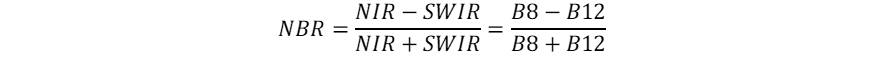

<h3>Indice de Severidad Normalizado (dNBR)</h3><div align="justify">  Es un índice normalizado que indica la pérdida de masa orgánica. La diferencia entre el NBR previo y posterior al incendio, obtenido de las imágenes satélite, se usa para calcular el diferencial NBR , con el que estimar la severidad del incendio. Un valor más alto de dNBR indica un daño más severo, mientras que las áreas con valores negativos de dNBR indican un creci-miento después de un incendio. </div> 
 


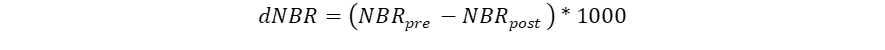

In [3]:
# Colección de imágenes de Sentinel con una nubosidad inferior al 20% y la medía calculada de los pixels
sentinel_pre= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate('2018-07-03', '2018-08-03')
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean()) #el filtro de nubosidad varía según imagen

sentinel_post= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate('2018-08-15', '2018-09-15')
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean())

#GENERER MAPAA EN MI PRACTICA

# Funciones de calculo NBR y dNBR
def NBR(image):
    NBR = image.expression('float(NIR-SWIR2)/(NIR+SWIR2)',{# dNBR CODIGOOOOOOOOOOO
        'NIR' : image.select("B8").multiply(0.0001),
        'SWIR2' : image.select("B12").multiply(0.0001),
    })
    return NBR

def dNBR(pre,post):
    dNBR = pre.subtract(post).multiply(1000) # dNBR CODIGOOOOOOOOOOO
    return dNBR 

# Parámetros de visualización de la imágen
vis_NBR ={
    'max': 1,
    'min': 0,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 
vis_dNBR ={
    'max': 1000,
    'min': 100,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 

# Llamada a las funciones
NBR_pre = NBR(sentinel_pre)
NBR_post = NBR(sentinel_post)
imagen_dNBR = dNBR(NBR_pre, NBR_post)

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'Marti_dNBR',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': imagen_dNBR,
        'description': 'Imagen procesada dNBR'
    }
ee.batch.Export.image.toDrive(**task_config).start()

# Crear y añadir elementos al mapa
mapa_dNBR = folium.Map(location=[39,-0.30], zoom_start = 12)
mapa_dNBR.addLayer(NBR_pre,vis_NBR, "NBR_pre")
mapa_dNBR.addLayer(NBR_post,vis_NBR, "NBR_post")
mapa_dNBR.addLayer(imagen_dNBR,vis_dNBR, "dNBR")
folium.LayerControl().add_to(mapa_dNBR)

mapa_dNBR


In [4]:
# Ejemplo aplicación de intervalos a imagenes.
sld_intervalos = """
    <RasterSymbolizer>
        <ColorMap type="intervals" extended="false" >
            <ColorMapEntry color="#0000ff" quantity="100" label="Zonas estables"/>
            <ColorMapEntry color="#00ff00" quantity="270" label="Gravedad baja" />
            <ColorMapEntry color="#007f30" quantity="440" label="Gravedad Moderada baja" />
            <ColorMapEntry color="#30b855" quantity="660" label="Gravedad Moderada alta" />
            <ColorMapEntry color="#ff0000" quantity="1000" label="Gravedad Alta" />
        </ColorMap>
    </RasterSymbolizer>"""

# Crear y añadir elementos al mapa
mapa_intervalo = folium.Map(location=[39,-0.30], zoom_start=12)
mapa_intervalo.addLayer(imagen_dNBR.sldStyle(sld_intervalos),None,'SLD intervalos')
folium.LayerControl().add_to(mapa_intervalo)
mapa_intervalo

<h2><font color="blue" >Mapa Dual (DualMap) </font></h2><p>
Este plugin nos permite en una misma ventana Html tener 2 mapas.
Crear un mapa Dual con los 2 mapas creados en la Tarea 1 y 2

In [5]:
# mapa dual
mapa_dual = plugins.DualMap(location=[39,-0.30], tiles=None, zoom_start=12)

# Mapas Base
folium.TileLayer('Stamen Terrain').add_to(mapa_dual.m1)
folium.TileLayer('CartoDB Positron').add_to(mapa_dual.m2)

# Para añadir una imagen aun mapa utilizar el plugin .add_to(mapa_dual.m1) o .add_to(mapa_dual.m2)
mapa_dual.m1.addLayer(imagen_dNBR,vis_dNBR, "dNBR")
mapa_dual.m2.addLayer(imagen_dNBR.sldStyle(sld_intervalos),None,'SLD intervalos')

# Añadir control de mapas
folium.LayerControl().add_to(mapa_dual)

# Guardar mapas
mapa_dual.save("Medio_Ambiente.html")

mapa_dual

### <font color="blue" >Catálogo de recursos GEE </font>
Enlace al catálogo de datos ofical de GEE<p>
<a href = 'https://developers.google.com/earth-engine/datasets'>https://developers.google.com/earth-engine/datasets</a>

<h2><font color="red" >TAREA 1</font></h2><p>
<h3> Realizar un mapa de Indice de Vegetación ajustado al suelo (SAVI) con imágenes SENTINEL 2A. de la evolución del incendio anterior. Guardar las imagenes como Geotiff</h3> <p>
 El método Índice de vegetación ajustado al suelo (SAVI) es un índice de vegetación que intenta minimizar las influencias del brillo del suelo utilizando un factor de corrección de brillo del suelo. Esto con frecuencia se utiliza en regiones áridas en donde la cubierta de vegetación es baja y genera valores entre -1,0 y 1,0, siendo la vegetación sana 0 a 1.   
Su creador, Huete, agregó un factor de ajuste del suelo L a la ecuación de NDVI para corregir los efectos del ruido del suelo (color del suelo, humedad del suelo, variabilidad del suelo a través de la región, etc.), que tienden a afectar a los resultados.
    
### L = 0.428 


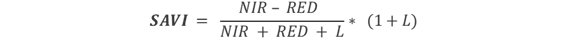

In [43]:
# Colección de imágenes de Sentinel con una nubosidad inferior al 20% y la medía calculada de los pixels
sentinel_pre= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate('2018-07-03', '2018-08-03')
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean()) #el filtro de nubosidad varía según imagen

sentinel_post= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate('2018-08-15', '2018-09-15')
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean())

#GENERER MAPAA EN MI PRACTICA

# Funciones de calculo SAVI y dsavi
def SAVI(image):
    SAVI = image.expression('float((NIR-RED)/(NIR+RED+L))*(1+L)',{# dsavi CODIGOOOOOOOOOOO
        'NIR' : image.select("B8").multiply(0.0001),
        'RED' : image.select("B4").multiply(0.0001),
        'L':0.428,

    })
    return SAVI


# Parámetros de visualización de la imágen
vis_SAVI ={
    'max': 1,
    'min': 0,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 


# Llamada a las funciones
SAVI_pre = SAVI(sentinel_pre)
SAVI_post = SAVI(sentinel_post)

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'alvaronordin_dsavi',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': SAVI_post,
        'description': 'Imagen procesada dsavi'
    }
ee.batch.Export.image.toDrive(**task_config).start()

# Crear y añadir elementos al mapa
mapa_dsavi = folium.Map(location=[39,-0.30], zoom_start = 12)
mapa_dsavi.addLayer(SAVI_pre,vis_SAVI, "SAVI_pre")
mapa_dsavi.addLayer(SAVI_post,vis_SAVI, "SAVI_post")
folium.LayerControl().add_to(mapa_dsavi)

mapa_dsavi


<h2><font color="red" >TAREA 2</font></h2><p>
<h3> Crear un mapa de Indice de Vegetación Mejorado (EVI) con imágenes LANDSAT 8 de la evolución del incendio anterior. Guardar las imagenes como Geotiff</h3><p>
EVI es un índice que trabaja las bandas rojo y azul del visible para corregir simultaneamente el efecto de la atmósfera y junto al factor L corregir la influencia del suelo. Además del factor L emplea dos parámetros adicionales constantes C (C1 = 6.0, C2 = 7.5) y G = 2.5
Los valores para EVI varían del -1 a 1, siendo la vegetación sana valores entre 0.2 y 0.8

###  L = 1.0
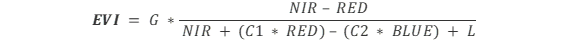

In [49]:
# Colección de imágenes de Sentinel con una nubosidad inferior al 20% y la medía calculada de los pixels
landsat_pre= (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
                  .filterDate('2018-07-03', '2018-08-03')
                  .filter(ee.Filter.lt('CLOUD_COVER',20)).mean()) #el filtro de nubosidad varía según imagen

landsat_post= (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
                  .filterDate('2018-08-15', '2018-09-15')
                  .filter(ee.Filter.lt('CLOUD_COVER',20)).mean())

#GENERER MAPAA EN MI PRACTICA

# Funciones de calculo NBR y dNBR

def EVI(image):

    EVI = image.expression('float(G*(NIR-RED)/(NIR+(C1*RED)-(C2*BLUE)+L))',{# dNBR CODIGOOOOOOOOOOO
        'NIR' : image.select("SR_B5").multiply(0.0000275),
        'RED' : image.select("SR_B4").multiply(0.0000275),
        'BLUE' : image.select("SR_B2").multiply(0.0000275),
        'C1' : 6.0,
        'C2' : 7.5,
        'G' : 2.5,
        'L' : 1.0,


    })
    return EVI

def dEVI(pre,post):
    dEVI = pre.subtract(post).multiply(1000) # dNBR CODIGOOOOOOOOOOO
    return dEVI

# Parámetros de visualización de la imágen
vis_EVI ={
    'max': 1,
    'min': 0,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 

# Llamada a las funciones
EVI_pre = EVI(landsat_pre)
EVI_post = EVI(landsat_post)
#imagen_dEVI = dEVI(EVI_pre, EVI_post)

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'alvarotallal_dEVI',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': EVI_post,
        'description': 'Imagen procesada dEVI'
    }
ee.batch.Export.image.toDrive(**task_config).start()

# Crear y añadir elementos al mapa
mapa_dEVI = folium.Map(location=[39,-0.30], zoom_start = 12)
mapa_dEVI.addLayer(EVI_pre,vis_EVI, "EVI_pre")
mapa_dEVI.addLayer(EVI_post,vis_EVI, "EVI_post")
folium.LayerControl().add_to(mapa_dEVI)

mapa_dEVI


<h2><font color="red" >TAREA 3</font></h2><p>
<h3> Realizar un mapa dual con los mapas obtenidos en la Tarea 1 y 2</h3> <p>
Salvar el mapa como:  <h4>Medio_Ambiente_'Apellido alumno'.html</h4>